In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize']=(10,5)
from sklearn.preprocessing import StandardScaler,En
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [3]:
df=pd.read_csv(r'C:\Users\Sarvadnya\FUSIONCLASS\machine_learning\Mobile_price_range.csv')
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [4]:
df['price_range'].unique()

array([1, 2, 3, 0])

In [5]:
df['price_range'].replace([0,1,2,3],['Vrey low','Low','Affordable','Expensive'],inplace=True)

In [6]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,Low
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,Affordable
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,Affordable
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,Affordable
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,Low


In [7]:
# model building 
# define x and y
x=df.iloc[:,:-1]
y=df['price_range']

In [8]:
# split data
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)

In [9]:
rfc=RandomForestClassifier(random_state=1)
rfc.fit(xtrain,ytrain)
yp=rfc.predict(xtest)
yp

array(['Vrey low', 'Vrey low', 'Low', 'Vrey low', 'Expensive', 'Low',
       'Vrey low', 'Affordable', 'Affordable', 'Expensive', 'Vrey low',
       'Expensive', 'Low', 'Low', 'Expensive', 'Vrey low', 'Vrey low',
       'Low', 'Low', 'Affordable', 'Expensive', 'Expensive', 'Low',
       'Affordable', 'Expensive', 'Affordable', 'Affordable', 'Expensive',
       'Affordable', 'Affordable', 'Affordable', 'Low', 'Affordable',
       'Vrey low', 'Expensive', 'Expensive', 'Vrey low', 'Vrey low',
       'Low', 'Vrey low', 'Low', 'Vrey low', 'Affordable', 'Low',
       'Vrey low', 'Low', 'Affordable', 'Affordable', 'Low', 'Affordable',
       'Affordable', 'Expensive', 'Low', 'Expensive', 'Affordable',
       'Expensive', 'Low', 'Expensive', 'Expensive', 'Low', 'Vrey low',
       'Affordable', 'Low', 'Expensive', 'Affordable', 'Low', 'Vrey low',
       'Affordable', 'Expensive', 'Affordable', 'Low', 'Affordable',
       'Vrey low', 'Expensive', 'Expensive', 'Low', 'Affordable', 'Low',
       '

In [10]:
print(f'training accuracy:{rfc.score(xtrain,ytrain)}')
print(f'test accuracy:{rfc.score(xtest,ytest)}')

training accuracy:1.0
test accuracy:0.88


In [11]:
rfc.estimators_

[DecisionTreeClassifier(max_features='sqrt', random_state=1791095845),
 DecisionTreeClassifier(max_features='sqrt', random_state=2135392491),
 DecisionTreeClassifier(max_features='sqrt', random_state=946286476),
 DecisionTreeClassifier(max_features='sqrt', random_state=1857819720),
 DecisionTreeClassifier(max_features='sqrt', random_state=491263),
 DecisionTreeClassifier(max_features='sqrt', random_state=550290313),
 DecisionTreeClassifier(max_features='sqrt', random_state=1298508491),
 DecisionTreeClassifier(max_features='sqrt', random_state=2143362693),
 DecisionTreeClassifier(max_features='sqrt', random_state=630311759),
 DecisionTreeClassifier(max_features='sqrt', random_state=1013994432),
 DecisionTreeClassifier(max_features='sqrt', random_state=396591248),
 DecisionTreeClassifier(max_features='sqrt', random_state=1703301249),
 DecisionTreeClassifier(max_features='sqrt', random_state=799981516),
 DecisionTreeClassifier(max_features='sqrt', random_state=1666063943),
 DecisionTreeCl

In [13]:
rfc.estimators_[0]

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,random_state,1791095845
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


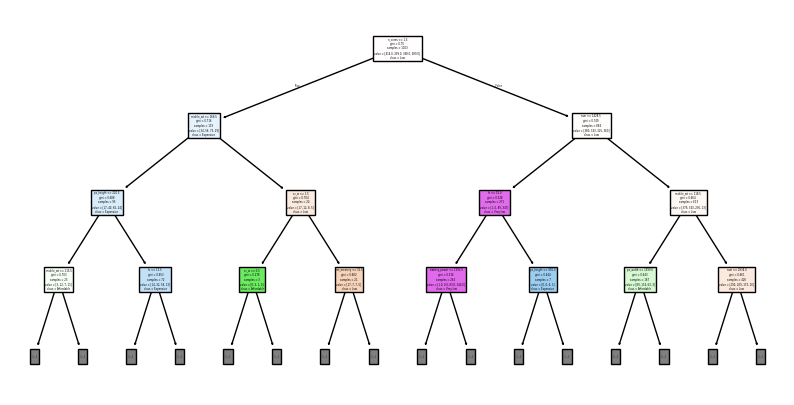

In [16]:
from sklearn import tree
tree.plot_tree(rfc.estimators_[0],feature_names=x.columns,class_names=df['price_range'].unique(),filled=True,max_depth=3)
plt.show()
plt.[figure.figsize']()